<a href="https://colab.research.google.com/github/komalagnihotri18/SHALA_Assgn/blob/master/Assignment_9ML_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries  :**

In [0]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

**Loading Dataset :**

In [0]:
# Data Loading
data='https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L9/assignment_shala_clustering.csv'
df=pd.read_csv(data)

**Printing First Five Rows of dataset :**

In [0]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Sometimes there are missing values found in datasets, so getting information of number of missing values in each columns.**

In [0]:
# Informations and details
df.info()
print('='*50)
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Dropping 'CustomerID' which is not significant 

In [0]:
df.drop('CustomerID', axis=1, inplace=True)

**Printing First Five rows of data**

In [0]:
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**Exploratory Data Analysis**
*  Gender Distribution using Pie chart

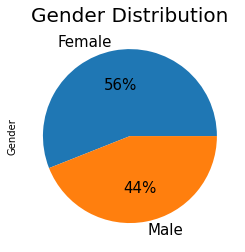

In [0]:
df['Gender'].value_counts().plot(kind='pie',autopct='%1.0f%%',fontsize=15)
plt.title('Gender Distribution',fontsize=20)
plt.show()

In [0]:
print(df['Annual Income (k$)'].min())
print(df['Annual Income (k$)'].max())

15
137


**Annual Income Distribution**

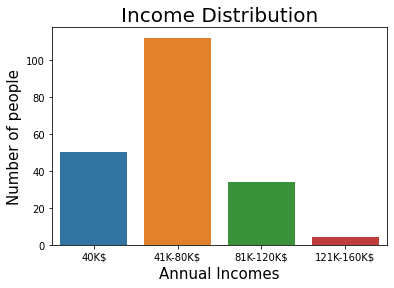

In [0]:
AI0_40 = df['Annual Income (k$)'][(df['Annual Income (k$)']>0) & (df['Annual Income (k$)']<=40)]
AI41_80 = df['Annual Income (k$)'][(df['Annual Income (k$)']>40) & (df['Annual Income (k$)']<=80)]
AI81_120 = df['Annual Income (k$)'][(df['Annual Income (k$)']>80) & (df['Annual Income (k$)']<=120)]
AI121_160 = df['Annual Income (k$)'][(df['Annual Income (k$)']>120) & (df['Annual Income (k$)']<160)]
x = ['40K$','41K-80K$','81K-120K$','121K-160K$']
y = [len(AI0_40),len(AI41_80),len(AI81_120),len(AI121_160)]
sns.barplot(x, y)
plt.title('Income Distribution',fontsize=20)
plt.xlabel('Annual Incomes',fontsize=15)
plt.ylabel('Number of people',fontsize=15)
plt.show()

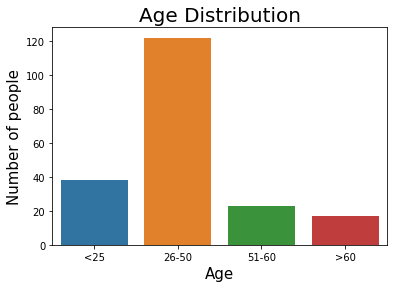

In [0]:
age0_25 = df['Age'][(df['Age']>0) & (df['Age']<=25)]
age26_50 = df['Age'][(df['Age']>25) & (df['Age']<=50)]
age51_60 = df['Age'][(df['Age']>50) & (df['Age']<=60)]
age60_more = df['Age'][(df['Age']>60)]
x=['<25','26-50','51-60','>60']
y=[len(age0_25),len(age26_50),len(age51_60),len(age60_more)]
sns.barplot(x,y)
plt.title('Age Distribution',fontsize=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Number of people',fontsize=15)
plt.show()

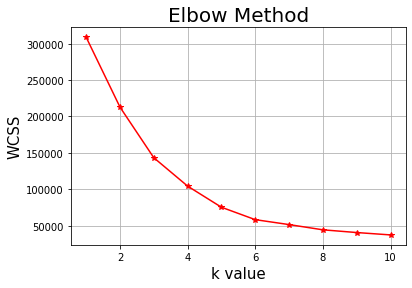

In [0]:
# Using Elbow method to get K-value
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(df.iloc[:,1:])
  wcss.append(kmeans.inertia_)
plt.xlabel('k value',fontsize=15)
plt.ylabel('WCSS',fontsize=15)
plt.plot(range(1,11),wcss,color='red',marker='*')
plt.grid()
plt.title('Elbow Method',fontsize=20)
plt.show()

**We get suitable value of k is 5. So now training model with KMeans Clustering using k=5**

In [0]:
# From above graph, we have found that k=5 is suitable for clusters.
cc =KMeans(n_clusters=5)
clusters=cc.fit_predict(df.iloc[:,1:])
df['label']=clusters

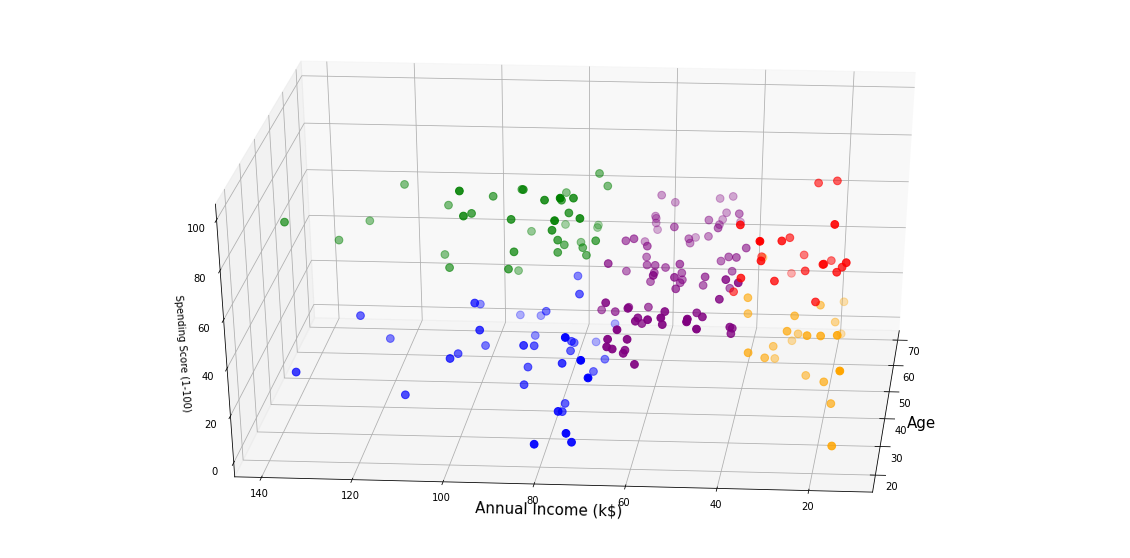

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Annual Income (k$)",fontsize=15)
ax.set_zlabel('Spending Score (1-100)')
plt.show()